# Decision Tree : Fraud Check Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
data['Taxable.Income'] = np.where(data['Taxable.Income']<=30000,'Risky','Good')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']=label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=label_encoder.fit_transform(data['Marital.Status'])
data['Work.Experience']=label_encoder.fit_transform(data['Work.Experience'])
data['Taxable.Income']=label_encoder.fit_transform(data['Taxable.Income'])
data['Urban']=label_encoder.fit_transform(data['Urban'])

In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [11]:
data['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [12]:
data['Work.Experience'].nunique()

31

In [13]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [14]:
data['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [15]:
data.shape

(600, 6)

In [16]:
array = data.values
array

array([[     0,      2,      0,  50047,     10,      1],
       [     1,      0,      0, 134075,     18,      1],
       [     0,      1,      0, 160205,     30,      1],
       ...,
       [     0,      0,      0, 154058,      0,      1],
       [     1,      1,      0, 180083,     17,      0],
       [     0,      0,      0, 158137,     16,      0]], dtype=int64)

In [17]:
X = array[:,[0,1,3,4,5]]
Y = array[:,2]

In [18]:
X

array([[     0,      2,  50047,     10,      1],
       [     1,      0, 134075,     18,      1],
       [     0,      1, 160205,     30,      1],
       ...,
       [     0,      0, 154058,      0,      1],
       [     1,      1, 180083,     17,      0],
       [     0,      0, 158137,     16,      0]], dtype=int64)

In [19]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=7)

In [21]:
x_train

array([[     0,      1,  69832,     25,      1],
       [     1,      1, 150349,      2,      0],
       [     0,      2, 105680,     22,      0],
       ...,
       [     1,      2, 100651,      6,      0],
       [     1,      1,  28410,     21,      0],
       [     1,      2,  57055,     13,      0]], dtype=int64)

In [22]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [23]:
x_test

array([[     0,      2,  68788,      7,      1],
       [     0,      0,  67820,     12,      0],
       [     0,      0,  95975,     13,      1],
       [     0,      1,  29602,     15,      1],
       [     1,      1,  73490,      7,      0],
       [     1,      0, 123335,      1,      1],
       [     0,      1,  70323,     25,      0],
       [     1,      0,  48956,      8,      0],
       [     1,      2, 139143,      7,      1],
       [     0,      1,  91689,     14,      1],
       [     1,      1,  91138,     23,      0],
       [     0,      2, 137622,      2,      1],
       [     1,      0,  59382,      5,      1],
       [     0,      2, 126488,      1,      1],
       [     0,      1, 114823,     11,      0],
       [     0,      0, 117364,     11,      0],
       [     1,      0,  34334,     21,      1],
       [     1,      1, 176891,     27,      1],
       [     0,      1,  89122,     28,      0],
       [     1,      0, 185099,     12,      0],
       [     0,     

In [24]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Building Decision Tree Classifier 

### Entropy Criteria

In [25]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4583333333333333, 0.875, 'X[2] <= 37925.0\nentropy = 0.735\nsamples = 450\nvalue = [357, 93]'),
 Text(0.25, 0.625, 'X[2] <= 36940.0\nentropy = 0.928\nsamples = 35\nvalue = [23, 12]'),
 Text(0.16666666666666666, 0.375, 'X[1] <= 0.5\nentropy = 0.885\nsamples = 33\nvalue = [23, 10]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.991\nsamples = 9\nvalue = [4, 5]'),
 Text(0.25, 0.125, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.625, 'X[2] <= 58380.0\nentropy = 0.712\nsamples = 415\nvalue = [334, 81]'),
 Text(0.5, 0.375, 'X[2] <= 54275.0\nentropy = 0.4\nsamples = 63\nvalue = [58, 5]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.489\nsamples = 47\nvalue = [42, 5]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.8333333333333334, 0.375, 'X[2] <= 66310.0\nentropy = 0.753\nsamples = 352\nvalue = [276, 76]'),
 Text(0.75, 0.125,

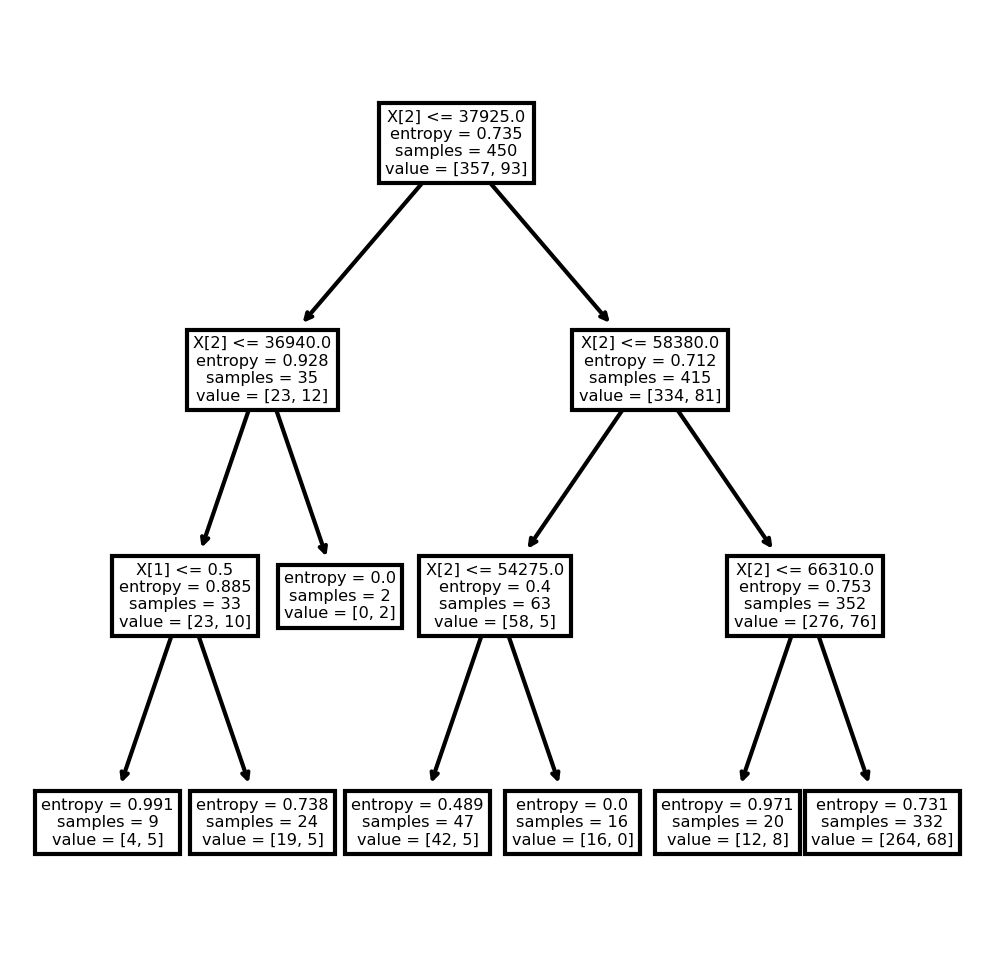

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

#PLot the decision tree
tree.plot_tree(model)

In [27]:
# Predicting on test data set 
pred_test1 = model.predict(x_test) 
pd.Series(pred_test1).value_counts()

0    145
1      5
dtype: int64

In [28]:
pred_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
pd.crosstab(y_test,pred_test1)

col_0,0,1
row_0,,
0,114,5
1,31,0


In [30]:
# Accuracy 
np.mean(pred_test1==y_test)

0.76

In [31]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test1))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       119
           1       0.00      0.00      0.00        31

    accuracy                           0.76       150
   macro avg       0.39      0.48      0.43       150
weighted avg       0.62      0.76      0.69       150



In [32]:
# Predicting on train data set
pred_train1 = model.predict(x_train)  
pd.Series(pred_train1).value_counts() 

0    439
1     11
dtype: int64

In [33]:
pd.crosstab(y_train,pred_train1)

col_0,0,1
row_0,,
0,353,4
1,86,7


In [34]:
# Accuracy 
np.mean(pred_train1==y_train)

0.8

In [35]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       357
           1       0.64      0.08      0.13        93

    accuracy                           0.80       450
   macro avg       0.72      0.53      0.51       450
weighted avg       0.77      0.80      0.73       450



### Gini Index

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
#Prediction and computing the accuracy for test data
pred_test=model_gini.predict(x_test)
#pd.Series(pred_test).value_counts() 

In [39]:
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
np.mean(pred_test==y_test)

0.78

In [41]:
pd.crosstab(y_test,pred_test)

col_0,0,1
row_0,,
0,117,2
1,31,0


In [42]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       119
           1       0.00      0.00      0.00        31

    accuracy                           0.78       150
   macro avg       0.40      0.49      0.44       150
weighted avg       0.63      0.78      0.70       150



In [43]:
#Prediction and computing the accuracy for train data
pred_train=model_gini.predict(x_train)
np.mean(pred_train==y_train)

0.8022222222222222

In [44]:
pd.crosstab(y_train,pred_train)

col_0,0,1
row_0,,
0,357,0
1,89,4


In [45]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       357
           1       1.00      0.04      0.08        93

    accuracy                           0.80       450
   macro avg       0.90      0.52      0.49       450
weighted avg       0.84      0.80      0.72       450



In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
results1 = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())       #Full data
print(results1.mean())      #Train data  

0.7433333333333333
0.7444444444444444


In [48]:
results

array([0.73333333, 0.7       , 0.81666667, 0.83333333, 0.71666667,
       0.7       , 0.75      , 0.63333333, 0.8       , 0.75      ])

In [49]:
results1

array([0.8       , 0.77777778, 0.71111111, 0.73333333, 0.73333333,
       0.68888889, 0.77777778, 0.64444444, 0.73333333, 0.84444444])

### AdaBoost Classification

In [50]:
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
result = cross_val_score(model, X, Y, cv=kfold)
result1 = cross_val_score(model, x_train, y_train, cv=kfold)
print(result.mean())        #Full data
print(result1.mean())       #Train data

0.7933333333333332
0.7866666666666666


In [51]:
result

array([0.78333333, 0.73333333, 0.86666667, 0.91666667, 0.75      ,
       0.76666667, 0.83333333, 0.66666667, 0.83333333, 0.78333333])

In [52]:
result1

array([0.8       , 0.8       , 0.73333333, 0.8       , 0.82222222,
       0.77777778, 0.8       , 0.66666667, 0.82222222, 0.84444444])